In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df =pd.read_csv('michelson_speed_of_light.csv', index_col=0)
df.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [3]:
speed = df['velocity of light in air (km/s)']


In [4]:
speed_arr =np.array(speed)
speed_arr

array([299850, 299740, 299900, 300070, 299930, 299850, 299950, 299980,
       299980, 299880, 300000, 299980, 299930, 299650, 299760, 299810,
       300000, 300000, 299960, 299960, 299960, 299940, 299960, 299940,
       299880, 299800, 299850, 299880, 299900, 299840, 299830, 299790,
       299810, 299880, 299880, 299830, 299800, 299790, 299760, 299800,
       299880, 299880, 299880, 299860, 299720, 299720, 299620, 299860,
       299970, 299950, 299880, 299910, 299850, 299870, 299840, 299840,
       299850, 299840, 299840, 299840, 299890, 299810, 299810, 299820,
       299800, 299770, 299760, 299740, 299750, 299760, 299910, 299920,
       299890, 299860, 299880, 299720, 299840, 299850, 299850, 299780,
       299890, 299840, 299780, 299810, 299760, 299810, 299790, 299810,
       299820, 299850, 299870, 299870, 299810, 299740, 299810, 299940,
       299950, 299800, 299810, 299870], dtype=int64)

In [5]:
mean = np.mean(speed_arr)
mean

299852.4

In [6]:
std = np.std(speed_arr)
std

78.61450247886836

In [18]:
samples = np.random.normal(mean,std, size=10000)
samples

array([299812.64593937, 299844.53742673, 299778.97605372, ...,
       299864.77535514, 299828.40079467, 299842.44080517])

In [19]:
def ecdf(samples_std):
    x=np.sort(samples_std)
    y=np.arange(1, len(x)+1)/len(x)
    return x, y

In [20]:
x_theor, y_theor = ecdf(samples)
x,y =ecdf(speed_arr)

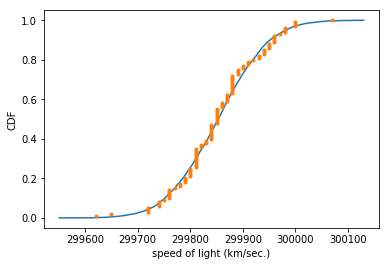

In [21]:
# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/sec.)')
_ = plt.ylabel('CDF')
plt.show()


# Optimal parameter
#### parameter values that bring the model in closest agreement with the data

# Packages to do statistical inference

  # - scipy.stats
  # - statsmodels
  # - hacker stats (with numpy)

In [22]:
#### Leats squares =  the process of finding the parameters for which the sum of the squares of residuals is minimal

In [25]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('2008_swing_states.csv')
df1.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [28]:
df1.total_votes.head()

0    127691
1     25787
2     17984
3     15947
4      7507
Name: total_votes, dtype: int64

In [30]:
total_votes =np.array(df1.total_votes)
total_votes

array([127691,  25787,  17984,  15947,   7507,  22835,  19286,  18517,
        44874, 121335,  38134, 219830,  21973,  51102,  18397,  13138,
       107876,  14271,   2444,  23307,  41229,  65022,   2245,  24284,
        49237,   3120, 146859, 106911,  53821,  14840,  14791,  17766,
       135175,  19195,  18802,  78206,  28063,  25582,  90451,  27449,
        33813,  75763,  68443,   9769,  33939,   8023,  90425,  30081,
        36981,  18680,  17400, 127032,  26923,  42103,  25168,  21173,
        61122,  10977,  52142,  14652, 187545, 135587,  63057,  48487,
        50263,  37302,  15479,  84488,  16502,  13114, 152473,  18632,
        53102,  13953,  21271,  65670,  16643,  29017,   9711,  23486,
       176873, 180000, 651436,  11113,  42950, 129529,  19745, 332924,
        35939,  28231,  58297,  22217,  24928,  23668,  98047,  16863,
       422419,  92416,   7787,  25793, 113304,  22443, 228137,  63641,
        35168,  18887, 254354, 194210,  17325,  52807,  32411,  39071,
      

In [33]:
dem_share = np.array(df1.dem_share)
dem_share

array([60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 56.94,
       50.46, 44.71, 65.99, 45.88, 42.23, 45.26, 46.15, 63.1 , 52.2 ,
       43.18, 40.24, 57.01, 53.61, 39.92, 47.87, 37.77, 40.11, 59.1 ,
       61.48, 49.85, 43.43, 48.61, 38.62, 54.25, 44.69, 34.84, 54.59,
       47.75, 48.36, 45.89, 48.62, 43.82, 55.97, 58.23, 43.92, 42.97,
       42.38, 36.11, 37.53, 38.23, 28.79, 42.65, 63.57, 50.96, 47.43,
       38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 56.24, 45.6 ,
       46.07, 39.43, 46.39, 35.22, 48.56, 32.97, 39.26, 57.88, 36.05,
       37.72, 47.47, 27.92, 50.36, 38.01, 45.45, 32.12, 29.07, 41.55,
       54.66, 57.81, 28.94, 51.28, 54.58, 32.88, 54.37, 50.1 , 39.84,
       40.45, 36.43, 35.71, 31.47, 47.61, 47.01, 60.49, 40.1 , 48.76,
       31.56, 43.11, 27.32, 44.03, 33.56, 37.26, 39.86, 54.64, 43.12,
       45.31, 35.47, 51.38, 46.33, 25.34, 49.79, 83.56, 40.09, 60.81,
       48.73, 49.81, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67,
       38.96, 46.29,

# Least squares with np.polyfit()

In [34]:
slope, intercept = np.polyfit(total_votes,dem_share,1)
slope

4.037071700946557e-05

In [36]:
intercept

40.11391196864175

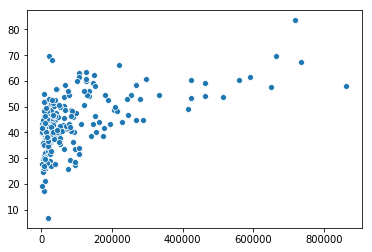

In [38]:
_ =sns.scatterplot(total_votes, dem_share)
plt.show()

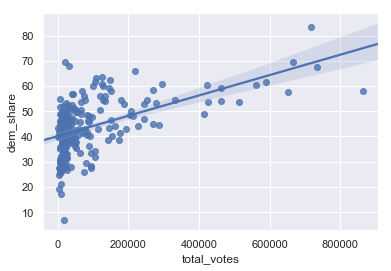

In [40]:
sns.set()
_ = sns.regplot(x ='total_votes', y ='dem_share', data=df1)

plt.show()

# EDA of literacy/fertility data

In [42]:
df2 = pd.read_csv('female_literacy_fertility.csv')
df2.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1324655000
1,Inde,ASI,50.8,2.682,1139964932
2,USA,NAM,99.0,2.077,304060000
3,Indonésie,ASI,88.8,2.132,227345082
4,Brésil,LAT,90.2,1.827,191971506


In [46]:
df2.tail()

,Country,Continent,female literacy,fertility,population
157,Vanuatu,OCE,79.5,3.883,233866
158,Samoa,OCE,98.5,3.852,178869
159,Sao Tomé-et-Principe,AF,83.3,3.718,160174
160,Aruba,LAT,98.0,1.732,105455
161,Tonga,ASI,99.1,3.928,103566


In [43]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [45]:
illiteracy

array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11

In [49]:
fertility = np.array(df2.fertility)
fertility

array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152,

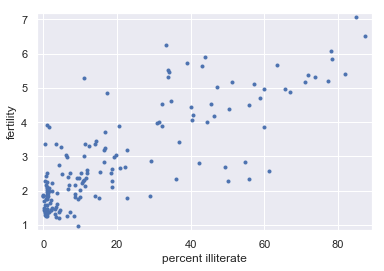

In [50]:
### we have fertility and illiteracy rate

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

plt.show()

# Computing the Pearson correlation coefficient

In [52]:
def pearson_r(x,y):
    corr_mat= np.corrcoef(x,y)
    
    return corr_mat[0,1]

In [53]:
print(pearson_r(illiteracy, fertility))

0.8041324026815341


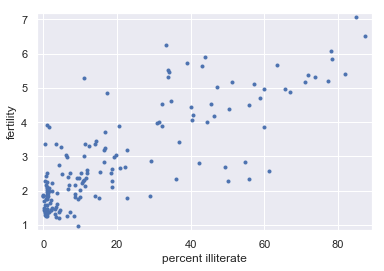

In [54]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()


# Linear regression

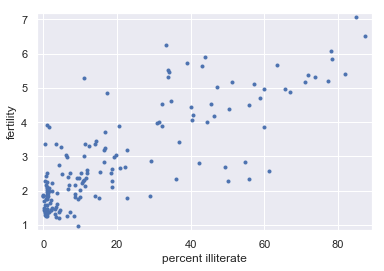

In [55]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

In [57]:
# Perform a linear regression using np.polyfit(): a, b

a, b = np.polyfit(illiteracy,fertility,1)

In [60]:
# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


In [64]:
# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b


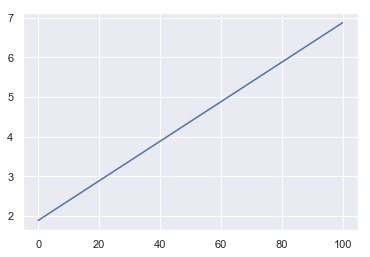

In [65]:
# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


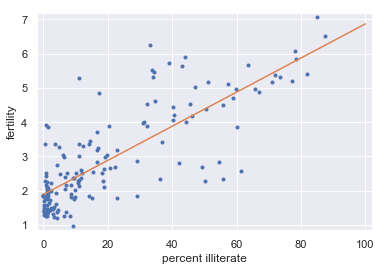

In [66]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

# How is it optimal?


##### The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares)

In [68]:
# Specify slopes to consider: a_vals  : a-slope
a_vals = np.linspace(0,0.1,200)


In [70]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [102]:
# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)


In [90]:
np.empty(8)

array([ 36.996875,  40.746875, 371.796875,  40.746875,  36.996875,
       258.186875, 371.796875, 258.186875])

In [95]:
a = ([1,2],[5,6])
np.empty_like(a)

array([[         0, 1075314688],
       [         0, 1074790400]])

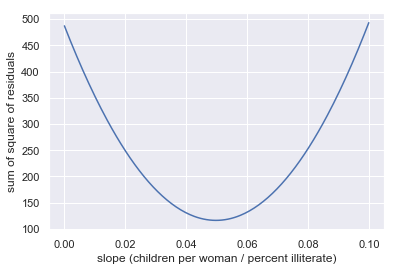

In [104]:
# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

    # Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


# The importance of EDA: Anscombe's quartet


0.5000909090909095 3.0000909090909076


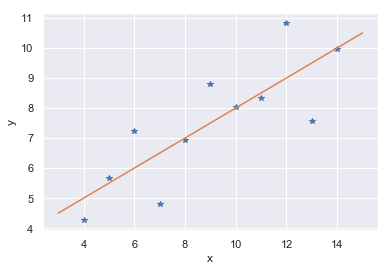

In [105]:
x=np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])

y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y,marker='*', linestyle='none')
_ = plt.plot(x_theor,y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Linear regression on all Anscombe data

In [115]:
x1 =np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x2 =np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x3= np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
x4 = np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])

y1 = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74])
y3= np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73])
y4 =np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])
anscombe_x = ([x1,x2,x2,x3])
anscombe_y =([y1,y2,y3,y4])


In [116]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: -0.1922727272727268 intercept: 9.231363636363634
